In [ ]:
pip install tensorflow

In [12]:
#Image Classification using tensorflow

#Neural Network framework --> Tensorflow 

#ML NN--> Input , Hidden layer (1,2,3,4) , Output layer 



import matplotlib.pyplot as plt  #-->visual tool
import numpy as np #numerical 
import PIL #image processing pillow/ opencv/ darknet,pytorch vision / nn
import tensorflow as tf 

from tensorflow import keras #framework of NN
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential  

In [13]:
#Input dataset

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')
print(data_dir)

C:\Users\bjawa\.keras\datasets\flower_photos


In [14]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


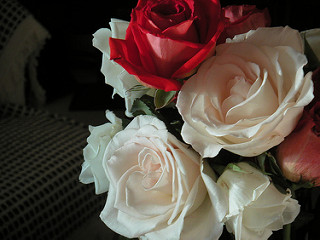

In [15]:
roses=list(data_dir.glob('roses*/*'))
PIL.Image.open(str(roses[1]))

In [16]:
#Dataset creation for out need 

batch_size = 32
img_height = 180
img_width = 180

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [19]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


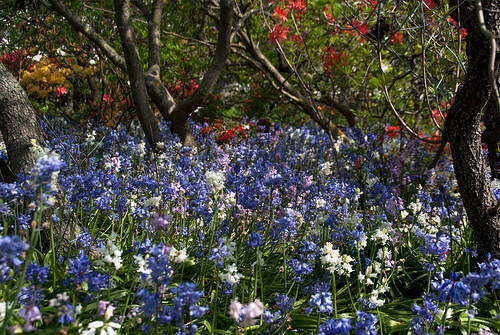

In [20]:
pictures=list(data_dir.glob('tulips*/*'))
PIL.Image.open(str(pictures[1]))

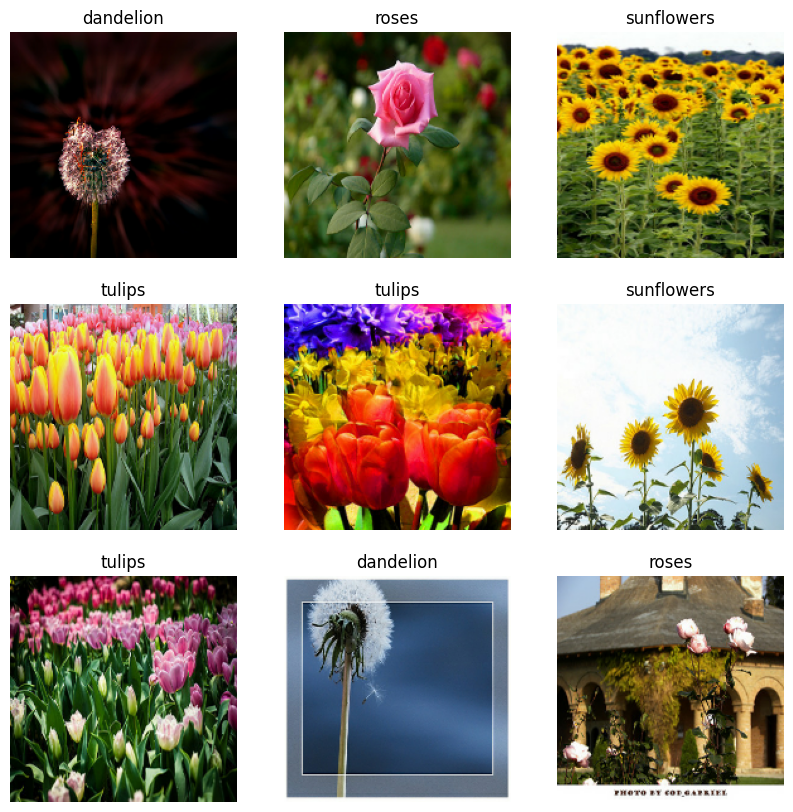

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds:
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [22]:
#tensor (32,180,180,3) 3-->RGB  --> Numpy
#Configure the dataset performance 
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
#Standardize the data
#255
#[0,255]  --> [0,1]
normalization_layer = layers.Rescaling(1./255)

normalized_ds=train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0003757252 0.99961853


In [31]:
#Model training with Keras 

#Neural Networks


num_classes = len(class_names)
print(num_classes)

model =Sequential ([
    
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
])

5


In [32]:
#Compile model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)       

In [34]:
#train

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 114s 1s/step - loss: 1.2074 - accuracy: 0.5014 - val_loss: 1.0337 - val_accuracy: 0.5627
Epoch 2/10
92/92 [==============================] - 72s 782ms/step - loss: 0.9411 - accuracy: 0.6301 - val_loss: 0.9193 - val_accuracy: 0.6444
Epoch 3/10
92/92 [==============================] - 71s 768ms/step - loss: 0.7302 - accuracy: 0.7251 - val_loss: 0.8596 - val_accuracy: 0.6485
Epoch 4/10
92/92 [==============================] - 71s 776ms/step - loss: 0.5239 - accuracy: 0.8123 - val_loss: 0.9245 - val_accuracy: 0.6785
Epoch 5/10
92/92 [==============================] - 73s 793ms/step - loss: 0.3592 - accuracy: 0.8726 - val_loss: 0.8748 - val_accuracy: 0.6853
Epoch 6/10
92/92 [==============================] - 70s 763ms/step - loss: 0.2488 - accuracy: 0.9206 - val_loss: 1.0980 - val_accuracy: 0.6717
Epoch 7/10
92/92 [==============================] - 73s 794ms/step - loss: 0.1262 - accuracy: 0.9629 - val_loss: 1.1713 - val_accuracy: 0.6771
E

[0.5013623833656311, 0.6301090121269226, 0.7251362204551697, 0.8123297095298767, 0.8726158142089844, 0.9206403493881226, 0.9628746509552002, 0.973433256149292, 0.9894413948059082, 0.9931880235671997]
[0.5626702904701233, 0.6444141864776611, 0.6485013365745544, 0.6784741282463074, 0.6852861046791077, 0.6716621518135071, 0.6771117448806763, 0.6430517435073853, 0.667574942111969, 0.6811988949775696]
[1.2073694467544556, 0.9410889148712158, 0.7302443385124207, 0.52391117811203, 0.359173983335495, 0.2488405853509903, 0.12617608904838562, 0.09013061225414276, 0.04536810144782066, 0.024021675810217857]
[1.0336894989013672, 0.9192574620246887, 0.8595907688140869, 0.9244690537452698, 0.8747819662094116, 1.0979976654052734, 1.1713192462921143, 1.3822336196899414, 1.5537470579147339, 1.5703926086425781]
range(0, 10)


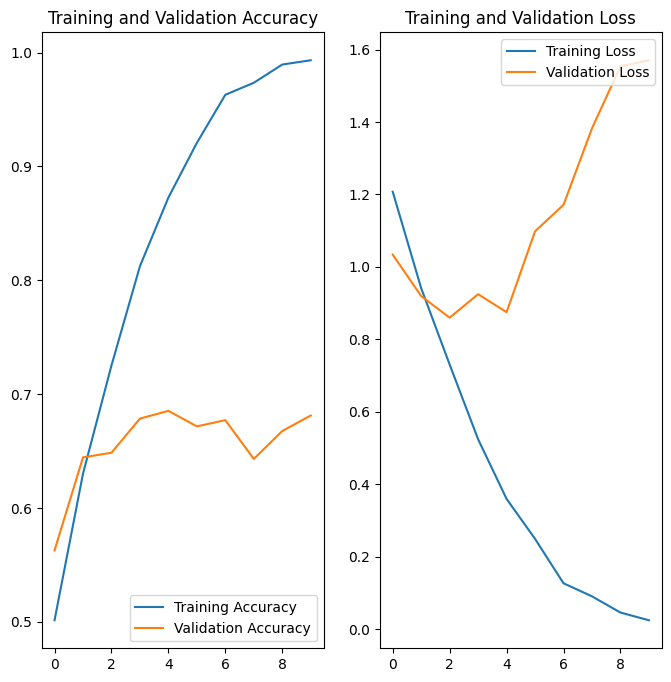

In [41]:
#result 

acc= history.history['accuracy']
print(acc)
val_acc=history.history['val_accuracy']
print(val_acc)

loss= history.history['loss']
print(loss)
val_loss=history.history['val_loss']
print(val_loss)

epochs_range = range(epochs)
print(epochs_range)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

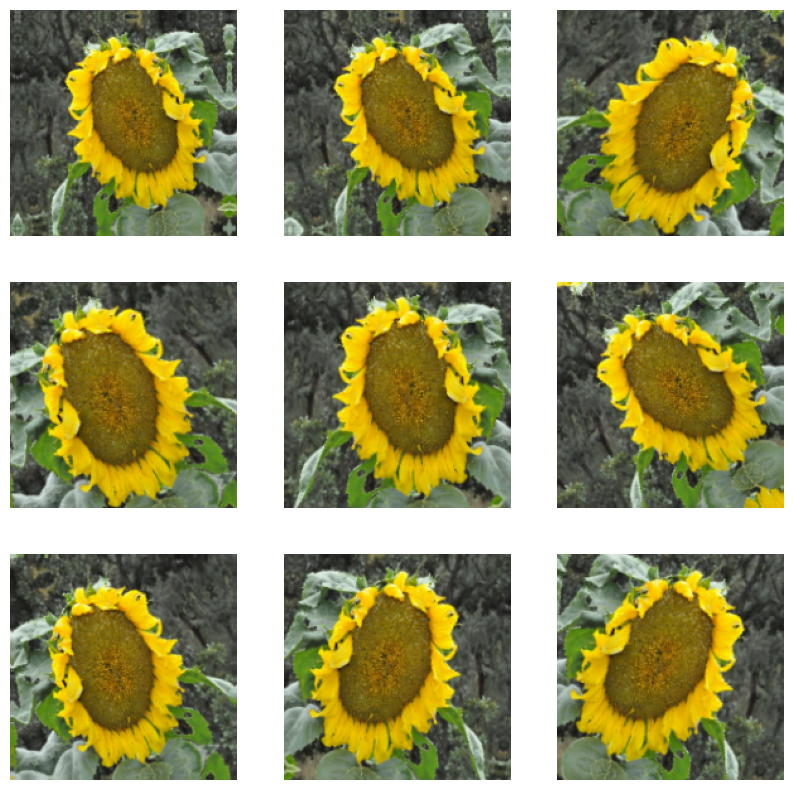

In [42]:
# Data augumentation  --(create differnt image ) --> 1  (flip, rotation ,zoom)

#overfitting (dropout) / under fitting -10   

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [43]:
# dropping(0,1) --> 10% , (0.2)-> 20% , (0.3)->30%


model =Sequential ([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name="outputs")
    
])

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [46]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 98s 1s/step - loss: 1.4583 - accuracy: 0.3937 - val_loss: 1.1288 - val_accuracy: 0.5368
Epoch 2/15
92/92 [==============================] - 89s 967ms/step - loss: 1.0526 - accuracy: 0.5770 - val_loss: 0.9599 - val_accuracy: 0.6226
Epoch 3/15
92/92 [==============================] - 100s 1s/step - loss: 0.9518 - accuracy: 0.6291 - val_loss: 0.9619 - val_accuracy: 0.6253
Epoch 4/15
92/92 [==============================] - 96s 1s/step - loss: 0.8838 - accuracy: 0.6584 - val_loss: 0.8829 - val_accuracy: 0.6417
Epoch 5/15
92/92 [==============================] - 105s 1s/step - loss: 0.8278 - accuracy: 0.6860 - val_loss: 0.9196 - val_accuracy: 0.6376
Epoch 6/15
92/92 [==============================] - 94s 1s/step - loss: 0.7796 - accuracy: 0.6952 - val_loss: 0.8538 - val_accuracy: 0.6744
Epoch 7/15
92/92 [==============================] - 114s 1s/step - loss: 0.7426 - accuracy: 0.7166 - val_loss: 0.8034 - val_accuracy: 0.6935
Epoch 8/15
92/

In [ ]:
#tensorflow lite model --> Mobile app (Image classification app)